In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Symptom.csv')

In [3]:
df.head()

,disease,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,fowlcholera,splenomegaly,arthralgia,dyspnea,cyanosis,NaN,NaN,NaN,NaN,NaN,NaN
1,infectiousbronchitis,bronchitis,rhinorrhea,ovipause,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,newcastledisease,dyspnea,rhinorrhea,opacification,immobilization,stoplying,NaN,NaN,NaN,NaN,NaN
3,fowlfox,mycosis,ulceration,canker,ovulation,NaN,NaN,NaN,NaN,NaN,NaN
4,newcastledisease,dyspnea,rhinorrhea,opacification,immobilization,stoplying,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(df.iloc[:,7:11],axis=1,inplace=True)

In [5]:
df.shape

(57, 7)

In [6]:
df.isna().sum()

disease       0
symptom_1     0
symptom_2     5
symptom_3     5
symptom_4    19
symptom_5    41
symptom_6    53
dtype: int64

In [7]:
X = df[['symptom_1','symptom_2','symptom_3','symptom_4','symptom_5','symptom_6']]
y = df['disease']

In [8]:
X

,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6
0,splenomegaly,arthralgia,dyspnea,cyanosis,NaN,NaN
1,bronchitis,rhinorrhea,ovipause,NaN,NaN,NaN
2,dyspnea,rhinorrhea,opacification,immobilization,stoplying,NaN
3,mycosis,ulceration,canker,ovulation,NaN,NaN
4,dyspnea,rhinorrhea,opacification,immobilization,stoplying,NaN
5,mycosis,ulceration,canker,ovulation,NaN,NaN
6,dyspnea,ovulation,diarrhoea,edema,cyanosis,petechiae
7,suddendeath,listless,disheveled,coccidiosis,kyphosis,NaN
8,neoplasia,blindness,immobility,NaN,NaN,NaN
9,tremors,asphyxiation,plucking,toxin,NaN,NaN


In [9]:
y

0              fowlcholera
1     infectiousbronchitis
2         newcastledisease
3                  fowlfox
4         newcastledisease
5                  fowlfox
6           avianinfluenza
7             quaildisease
8           marek’sdisease
9                 botulism
10              mushychiks
11              mushychiks
12                 fowlfox
13             fowlcholera
14                pullorum
15          marek’sdisease
16    infectiousbronchitis
17                  thrush
18        infectiouscoryza
19              bumblefoot
20        infectiouscoryza
21                pullorum
22          marek’sdisease
23              bumblefoot
24                  thrush
25        infectiouscoryza
26          marek’sdisease
27                botulism
28    infectiousbronchitis
29              bumblefoot
30             fowlcholera
31              mushychiks
32                  thrush
33              mushychiks
34            quaildisease
35                pullorum
36            quaildisease
3

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in X.columns:
    # Check if the column has missing values
    if X[col].isnull().any():
        # Create a mask to identify non-null values
        mask = X[col].notnull()
        # Apply label encoding only to non-null values
        X.loc[mask, col] = label_encoder.fit_transform(X.loc[mask, col])
    else:
        # Encode all values if no missing values
        X[col] = label_encoder.fit_transform(X[col])

y = label_encoder.fit_transform(y)
X

C:\Users\Prathmesh\AppData\Local\Temp\ipykernel_340\505405122.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])


,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6
0,9,0,3,1,NaN,NaN
1,0,9,7,NaN,NaN,NaN
2,3,9,6,4,3,NaN
3,6,10,0,6,NaN,NaN
4,3,9,6,4,3,NaN
5,6,10,0,6,NaN,NaN
6,3,7,1,3,0,0
7,10,5,2,0,2,NaN
8,7,2,5,NaN,NaN,NaN
9,11,1,8,8,NaN,NaN


In [11]:
X.isna().sum()

symptom_1     0
symptom_2     5
symptom_3     5
symptom_4    19
symptom_5    41
symptom_6    53
dtype: int64

In [12]:
from sklearn.impute import KNNImputer

# Select the columns for imputation
columns_to_impute = ['symptom_2','symptom_3','symptom_4', 'symptom_5', 'symptom_6']

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation for selected columns
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])

C:\Users\Prathmesh\AppData\Local\Temp\ipykernel_340\1956186314.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])


In [13]:
X.isna().sum()

symptom_1    0
symptom_2    0
symptom_3    0
symptom_4    0
symptom_5    0
symptom_6    0
dtype: int64

In [14]:
X.describe()

,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.0
mean,5.385965,5.269231,4.403846,3.811634,1.700000,0.0
std,3.447330,3.111702,2.681015,2.295148,0.818535,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,3.000000,2.000000,2.000000,1.200000,0.0
50%,5.000000,5.269231,4.403846,4.000000,1.800000,0.0
75%,8.000000,8.000000,7.000000,5.000000,2.400000,0.0
max,11.000000,10.000000,9.000000,8.000000,3.000000,0.0


In [15]:
X

,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6
0,9,0.000000,3.000000,1.000000,1.8,0.0
1,0,9.000000,7.000000,3.600000,2.6,0.0
2,3,9.000000,6.000000,4.000000,3.0,0.0
3,6,10.000000,0.000000,6.000000,0.6,0.0
4,3,9.000000,6.000000,4.000000,3.0,0.0
5,6,10.000000,0.000000,6.000000,0.6,0.0
6,3,7.000000,1.000000,3.000000,0.0,0.0
7,10,5.000000,2.000000,0.000000,2.0,0.0
8,7,2.000000,5.000000,4.200000,1.2,0.0
9,11,1.000000,8.000000,8.000000,1.4,0.0


In [16]:
y

array([ 3,  5,  9,  4,  9,  4,  0, 11,  7,  1,  8,  8,  4,  3, 10,  7,  5,
       12,  6,  2,  6, 10,  7,  2, 12,  6,  7,  1,  5,  2,  3,  8, 12,  8,
       11, 10, 11,  1,  2,  0,  9,  4, 11,  1,  3,  6,  7, 12,  2,  8, 10,
        0,  5,  9,  1,  0,  5])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [19]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [21]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [22]:
accuracy_bar = []
precision_bar = []
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='micro')
    accuracy_bar.append(accuracy)
    precision_bar.append(precision)
    confusion = confusion_matrix(y_test,y_pred)
    return accuracy,precision,confusion

In [23]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.0,
 0.0,
 array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 2, 0, 0, 0, 0]], dtype=int64))

In [24]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.6666666666666666,
 0.6666666666666666,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 2, 0, 0, 0, 0]], dtype=int64))

In [25]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.6666666666666666,
 0.6666666666666666,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 2, 0, 0, 0]], dtype=int64))

In [26]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.3333333333333333,
 0.3333333333333333,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64))

In [27]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

(0.8333333333333334,
 0.8333333333333334,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 2, 0, 0, 0]], dtype=int64))

In [28]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

(1.0,
 1.0,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64))

In [29]:
train_classifier(abc,X_train,y_train,X_test,y_test)

(0.5833333333333334,
 0.5833333333333334,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0]], dtype=int64))

In [30]:
train_classifier(bc,X_train,y_train,X_test,y_test)

(1.0,
 1.0,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64))

In [31]:
train_classifier(etc,X_train,y_train,X_test,y_test)

(1.0,
 1.0,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64))

In [32]:
train_classifier(gbdt,X_train,y_train,X_test,y_test)

(1.0,
 1.0,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64))

In [33]:
train_classifier(xgb,X_train,y_train,X_test,y_test)

(1.0,
 1.0,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64))

In [34]:
train_classifier(gnb,X_train,y_train,X_test,y_test)

(1.0,
 1.0,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64))

In [35]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.6666666666666666,
 0.6666666666666666,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 2, 0, 0, 0]], dtype=int64))

In [36]:
train_classifier(bnb,X_train,y_train,X_test,y_test)

(0.3333333333333333,
 0.3333333333333333,
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0]], dtype=int64))

In [37]:
print(accuracy_bar)
print(precision_bar)

[0.0, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.8333333333333334, 1.0, 0.5833333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 0.3333333333333333]
[0.0, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.8333333333333334, 1.0, 0.5833333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 0.3333333333333333]


In [38]:
categories = ['SVC','KNeighborsClassifier','MultinomialNB','DecisionTree','LogisticRegression','RandomForest','AdaBoostClassifier','BaggingClassifier','ExtraTreeClassfier','GradientBoosting','XGBClassifier','GaussianNB','MultinomialNB','BernoulliNB']

In [39]:
categories

['SVC',
 'KNeighborsClassifier',
 'MultinomialNB',
 'DecisionTree',
 'LogisticRegression',
 'RandomForest',
 'AdaBoostClassifier',
 'BaggingClassifier',
 'ExtraTreeClassfier',
 'GradientBoosting',
 'XGBClassifier',
 'GaussianNB',
 'MultinomialNB',
 'BernoulliNB']

In [40]:
accuracy_bar

[0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.3333333333333333,
 0.8333333333333334,
 1.0,
 0.5833333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0.3333333333333333]

In [41]:
precision_bar

[0.0,
 0.6666666666666666,
 0.6666666666666666,
 0.3333333333333333,
 0.8333333333333334,
 1.0,
 0.5833333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0.3333333333333333]

In [42]:
import matplotlib.pyplot as plt

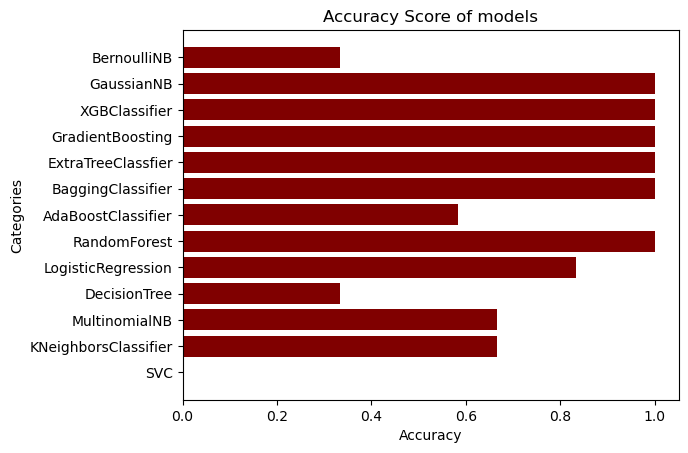

In [43]:
plt.barh(categories,accuracy_bar, color='maroon')
plt.ylabel('Categories')
plt.xlabel('Accuracy')
plt.title('Accuracy Score of models')
plt.show()

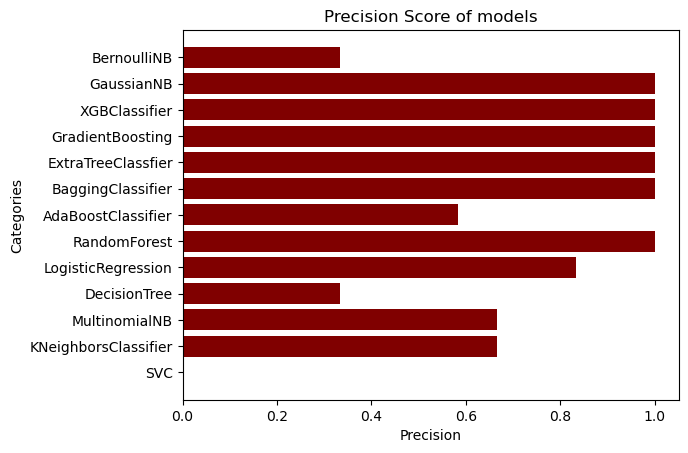

In [44]:
plt.barh(categories,precision_bar, color='maroon')
plt.ylabel('Categories')
plt.xlabel('Precision')
plt.title('Precision Score of models')
plt.show()